# Sistemas Multimedia

## Comparing quantizer in subbands

### Global Configuration

In [ ]:
!sudo rm -r /tmp/*
q_step=32  
predictor=2  
valores_q_step = [8,16,20] 
tipos_cuantificacion = ["deadzone"]
imagenes = 2
gop_sizes = [1]


for gop in gop_sizes:
    !mkdir /tmp/{gop}/
    for q_step in valores_q_step:
        !mkdir /tmp/{gop}/{q_step} && mkdir /tmp/{gop}/{q_step}/original  &&  cp sequences/stockholm/* /tmp/{gop}/{q_step}/original/
        !mkdir /tmp/{gop}/{q_step}/mcdwt && cp /tmp/{gop}/{q_step}/original/* /tmp/{gop}/{q_step}/mcdwt/ 
        !cd src/ && python3 -O MDWT.py -p /tmp/{gop}/{q_step}/mcdwt/ -N 2
        !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{gop}/{q_step}/mcdwt/ -T {gop} -N 1
     

003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 8
Banda : LL
cp: -r not specified; omitting directory '/tmp/8/midthreat/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/8/midthreat/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/8/midthreat/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/8/midthreat/HH/inversas'
003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 16
Banda : LL
cp: -r not specified; omitting directory '/tmp/16/midthreat/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/16/midthreat/LH/inversas'
Banda : HL
cp: -r not specified; omitting directory '/tmp/16/midthreat/HL/inversas'
Banda : HH
cp: -r not specified; omitting directory '/tmp/16/midthreat/HH/inversas'
003.png  HH003.png  HL003.png  LH003.png  LL003.png
Step : 20
Banda : LL
cp: -r not specified; omitting directory '/tmp/20/midthreat/LL/inversas'
Banda : LH
cp: -r not specified; omitting directory '/tmp/20/mi

### Plotting BR/Error

In [ ]:

bandas = ["LL","LH","HL","HH"]

tipos_cuantificacion = ["deadzone"]  
q_step=32  
predictor=2  
valores_q_step = [8,16,20,50,100,150,200,400,512,1028] 
tipos_cuantificacion = ["deadzone"]
imagenes = 9
gop_sizes = [1]
imgs=[2]
contador = 0 
###

#/tmp/{gop}/{q_step}/mcdwt/
for gop in gop_sizes:  
    for q_step in valores_q_step:
        !mkdir /tmp/{gop}/{q_step}/cuantificadas/ 
        for tipo in tipos_cuantificacion:
            for imagen in [0,1]: 
                ii ="{:03d}".format(imagen)
                print(ii)
                !mkdir /tmp/{gop}/{q_step}/cuantificadas/{imagen}/
                for banda in bandas:
                    !mkdir /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/ 
                    print("Banda " + banda+" creaeda")
                    !cp /tmp/{gop}/{q_step}/mcdwt/* /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/
                    !python3 tools/quantize.py -t {tipo} -i /tmp/{gop}/{q_step}/mcdwt/{banda}{ii}.png -o /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/{banda}{ii}.png -q {q_step}  
                    !mkdir /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas  &&  cp /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/* /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas  
                    !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas/ -b  -N 1
                    !cd src/ && python3 -O MDWT.py -p /tmp/{gop}/{q_step}/cuantificadas/{imagen}/{banda}/inversas/ -b  -N 2

    
print("Se acaba el primer bucle") 


{'LL': [], 'LH': [], 'HL': [], 'HH': []}
{0: {'LL': [[2458322.0, 6.529197523328993], [2351723.0, 20.56881069607205], [2334072.0, 30.661195543077255]], 'LH': [[2278931.0, 4.519984605577257], [2106466.0, 11.015995619032118], [2078629.0, 14.048587375217014]], 'HL': [[2192226.0, 4.758382161458333], [2063741.0, 9.227001614040798], [2051514.0, 10.596148342556424]], 'HH': [[2248351.0, 3.6718756781684028], [2246315.0, 3.760434299045139], [2246156.0, 3.777570597330729]]}, 1: {'LL': [[2456746.0, 6.513184611002604], [2350318.0, 20.507815551757812], [2332339.0, 30.581135728624133]], 'LH': [[2277628.0, 4.524690755208334], [2106039.0, 11.012608506944444], [2078392.0, 14.0368408203125]], 'HL': [[2191034.0, 4.751099310980903], [2062420.0, 9.19984842936198], [2050395.0, 10.588402981228299]], 'HH': [[2247731.0, 3.6575775146484375], [2245465.0, 3.7571892632378474], [2245328.0, 3.769461737738715]]}}


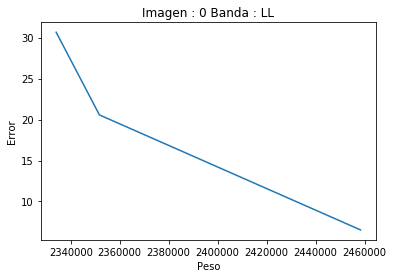

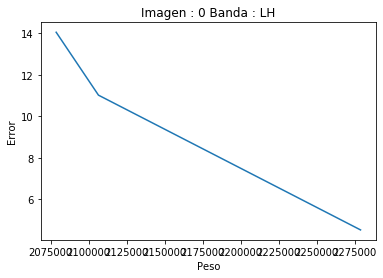

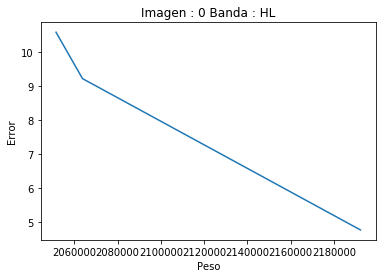

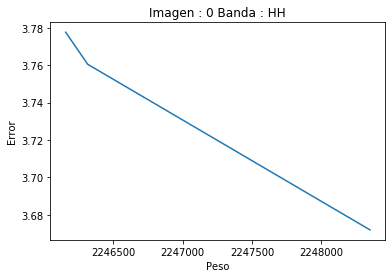

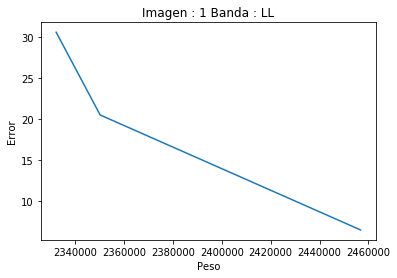

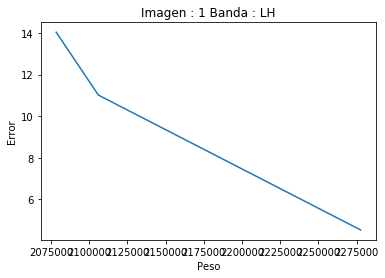

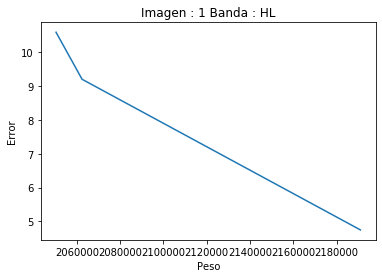

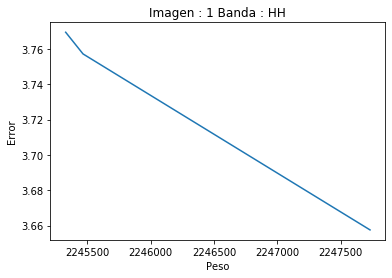

In [16]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

###
resultado_total = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}
valores_q_step = [8,16,20,50,100,150,200,400,512,1028] 

diccionarios = []
bandas = ["LL","LH","HL","HH"]

tipos_cuantificacion = ["deadzone"]  
q_step=32  
predictor=2  
valores_q_step = [8,16,20,50,100,150,200,400,512,1028]  
tipos_cuantificacion = ["deadzone"]
imagenes = 9
gop_sizes = [1]
imgs=[2]
contador = 0 
gops = {}
resultado = {}
s = Sumando()
for gop in [1]:
    for imagen in range(0,2**gop):
        gops[imagen] = {"LL" : [],"LH" : [],"HL" : [],"HH" : []}
        ii ="{:03d}".format(imagen)
        for q_step in valores_q_step: 
            diccionario = {}
            for tipo in tipos_cuantificacion:
                for banda in ["LL", "LH", "HL", "HH"]:
                    pesos = s.GetPesosSubbandasGOP(str(tipo), str(q_step),banda,imagen,gop)
                    MSE = 0.0
                    MSE += s.GetMSEGOP(tipo,imagen,q_step,banda,gop)
                    gops[imagen][banda].append([pesos,MSE]) 
    resultado[gop] = gops
     
                    
print(resultado_total)
print(resultado[1])



nuevo_diccionario = resultado[1]

diccionario = nuevo_diccionario


for imagen in diccionario:
    for banda in diccionario[imagen]:
        plot = plt.plot([i[0] for i in diccionario[imagen][banda]],[i[1] for i in diccionario[imagen][banda]],label="Imagen : "+str(imagen) + " Banda : "+banda)
        plt.ylabel('Error')
        plt.xlabel('Peso')
        plt.title("Imagen : "+str(imagen) + " Banda : "+banda)
        plt.show()


### Optimal RD Points